In [1]:
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import time

In [4]:
# read images from local directory

im01 = img.imread('/Users/yansky/Desktop/CS498_AML/CS-498/hw8/RobertMixed03.jpg')
im02 = img.imread('/Users/yansky/Desktop/CS498_AML/CS-498/hw8/smallstrelitzia.jpg')
im03 = img.imread('/Users/yansky/Desktop/CS498_AML/CS-498/hw8/smallsunset.jpg')
im04 = img.imread('/Users/yansky/Desktop/CS498_AML/CS-498/hw8/tree.jpg')
pixs01 = np.reshape(im01,  (im01.shape[0]*im01.shape[1], 3))
pixs02 = np.reshape(im02,  (im02.shape[0]*im03.shape[1], 3))
pixs03 = np.reshape(im03,  (im03.shape[0]*im03.shape[1], 3))
pixs04 = np.reshape(im04,  (im04.shape[0]*im04.shape[1], 3))

In [ ]:
mu_list=[]
for i in range(5):
    kmeans = KMeans(n_clusters = 20, init = "random").fit(pixs04)
    mu = kmeans.cluster_centers_
    mu_list.append(mu)

In [ ]:
mu_list[3]

In [ ]:
# initialize parameters

    # Inputs: pixels: RGB image pixels
    #         segments: number of clusters
    #
    # Return: mu: cluster centers
    #         pi: cluster weights

def init_para(pixels, segments):
    
    kmeans = KMeans(n_clusters = segments, init = "random", random_state = 0).fit(pixels)
    mu = kmeans.cluster_centers_
    pi = np.ones((segments, 1))/segments
    
    return mu, pi

In [ ]:
# E-step

    # Inputs: pixels: RGB image pixels in (r,g,b) form
    #         mu: cluster centers, size: (segments * 3)
    #         pi: cluster weights, size: (segments * 1)
    #
    # Return: w: weights that a data belongs to a cluster
    
def estimation(pixels, mu, pi):
    
    w = np.zeros((pixels.shape[0], mu.shape[0]))
    for x in range(pixels.shape[0]):
        pixel = np.array([pixels[x]]*mu.shape[0])
        diff = np.subtract(pixel, mu)
        square = np.multiply(diff, diff)
        min_idx = np.argmin(np.sum(square, axis = 1))
        dmin = square[min_idx]
        square = np.subtract(square, dmin)
        power = -1/2 * np.sum(square, axis=1)
        weight = np.multiply(np.exp(power), pi.T)
        w[x] = np.divide(weight, np.sum(weight))
        
    return w

In [ ]:
# M-step

    # Inputs: pixels: RGB image pixels
    #         w: weights that a data belongs to a cluster  
    #
    # Return: mu: cluster centers
    #         pi: cluster weights  
    
def maximization(pixels, w):
    
    mu = np.zeros((w.shape[1], pixels.shape[1]))
    pi = np.zeros((w.shape[1], 1))
    for c in range(w.shape[1]):
        
        w_c = w.T[c]
        mu_num = np.matmul(pixels.T, w_c)
        mu_denom = np.sum(w_c)
        mu[c] = np.divide(mu_num, mu_denom)
        pi[c] = np.divide(mu_denom, pixels.shape[0])
        
    return mu, pi

In [ ]:
# EM iteration

    # Inputs: it: iterating times
    #         pixels: RGB image pixels 
    #         mu: cluster centers
    #         pi: cluster weights  
    #
    # Return: mu: updated cluster centers after iterations
    #         pi: updated cluster weights after iterations

def EM(it, pixels, mu, pi):
    
    if it==0:
        
        return mu,pi
    
    else:
        
        w = estimation(pixels, mu, pi)
        mu, pi = maximization(pixels, w)
        
        return EM(it-1, pixels, mu, pi)

In [ ]:
def implot(im, mu):
    
    rows = im.shape[0]
    cols = im.shape[1]
    im_out = np.zeros((rows, cols, 3))
    for r in range(rows):
        for c in range(cols):
            idx = np.argmin(np.sum(np.abs(np.subtract(im[r,c,:], mu)), axis = 1))
            im_out[r,c,:] = mu[idx]
    
    return im_out

In [ ]:
start_time = time.time()

### Parameters you may want to modify

it = 10 # number of iterations
segments = 20 # number of segments

###

# image 1

mu0, pi0 = init_para(pixs01, segments)

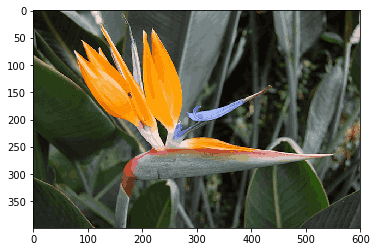

In [92]:
# generate images

start_time = time.time()

### Parameters you may want to modify

it = 10 # number of iterations
segments = 50 # number of segments

###

# image 1

mu0, pi0 = init_para(pixs01, segments)
mu, pi = EM(it, pixs01, mu0, pi0)
im01_out = implot(im01, mu)
plt.figure()
plt.imshow(im01_out/255)
plt.imsave("im01_cluster20.png", im01_out/255)

# image 2

mu0, pi0 = init_para(pixs02, segments)
mu, pi = EM(it, pixs02, mu0, pi0)
im02_out = implot(im02, mu)
plt.figure()
plt.imshow(im02_out/255)
plt.imsave("im02_cluster50.png", im02_out/255)

# image 3

mu0, pi0 = init_para(pixs03, segments)
mu, pi = EM(it, pixs03, mu0, pi0)
im03_out = implot(im03, mu)
plt.figure()
plt.imshow(im03_out/255)
plt.imsave("im03_cluster20.png", im03_out/255)

print("---total cost for this training is %s seconds ---" % (time.time() - start_time))

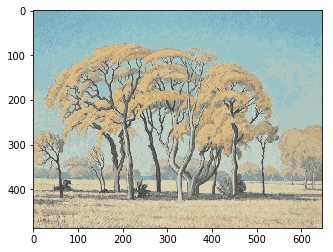

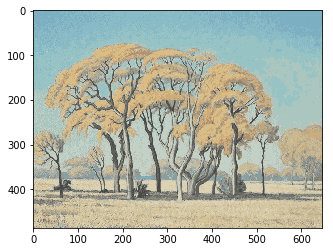

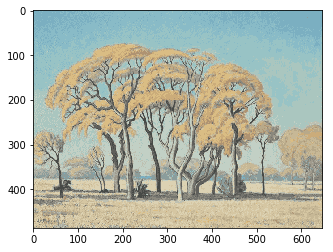

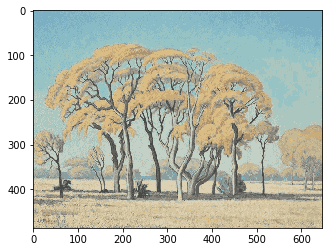

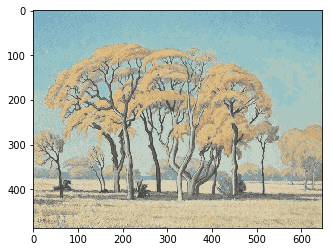

In [30]:
start_time = time.time()
segments=20
it = 10
pi0 = np.ones((segments, 1))/segments
for i in range(5):
    mu, pi = EM(it, pixs04, mu_list[i], pi0)
    im04_out = implot(im04, mu)
    plt.figure()
    plt.imshow(im04_out/255)
    plt.imsave("im04_cluster"+str(i)+".png", im04_out/255)